**LOADING DATASET**

In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv("/content/raw.githubusercontent.com_amankharwal_Website-data_master_IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**CLEANING AND PREPROCESSING**

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
 df['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA VISUALIZATION**

<Axes: xlabel='species', ylabel='sepal_length'>

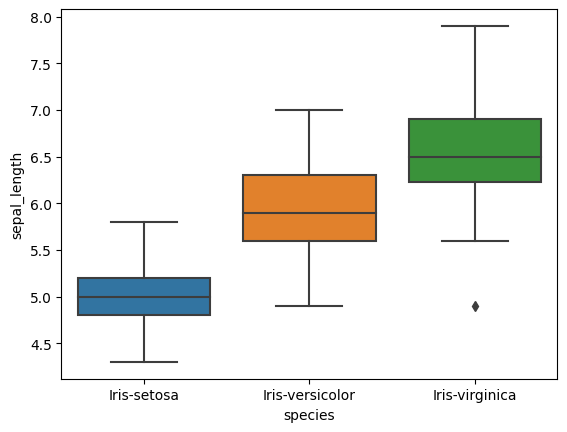

In [ ]:
sns.boxplot(x='species',y='sepal_length',data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

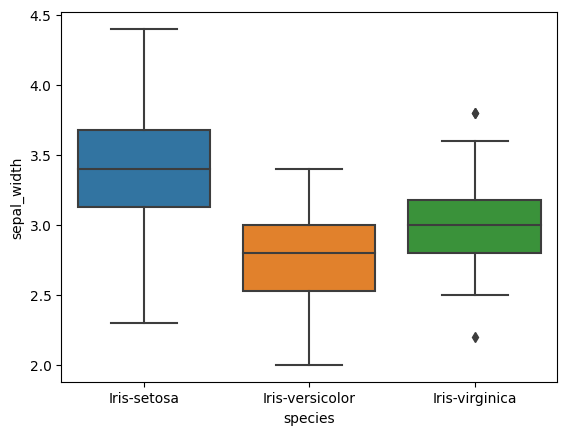

In [ ]:
sns.boxplot(x='species',y='sepal_width',data=df)

<Axes: xlabel='species', ylabel='petal_length'>

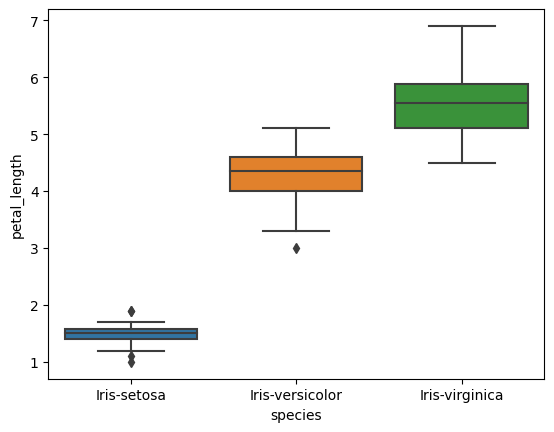

In [ ]:
sns.boxplot(x='species',y='petal_length',data=df)

<Axes: xlabel='species', ylabel='petal_width'>

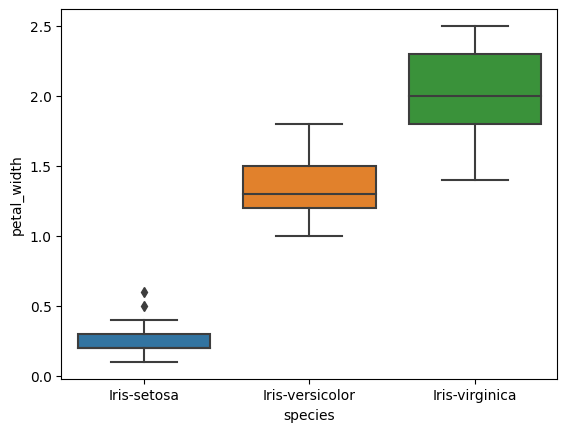

In [ ]:
sns.boxplot(x='species',y='petal_width',data=df)

<Axes: xlabel='sepal_width'>

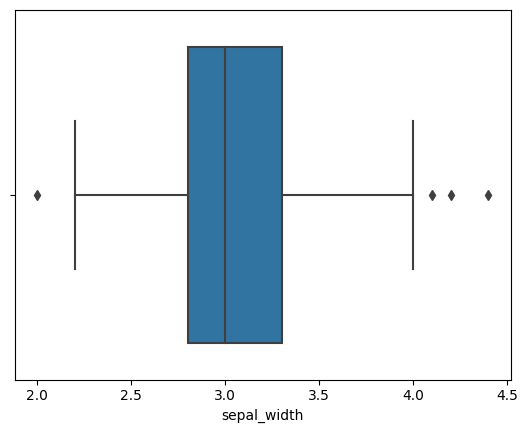

In [ ]:
sns.boxplot(x='sepal_width', data=df)


**REMOVING OUTLIERS**

Old Shape:  (150, 5)
New Shape:  (146, 5)


<ipython-input-14-2e45341ad3e5>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal_width'], 25,
<ipython-input-14-2e45341ad3e5>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal_width'], 75,


<Axes: xlabel='sepal_width'>

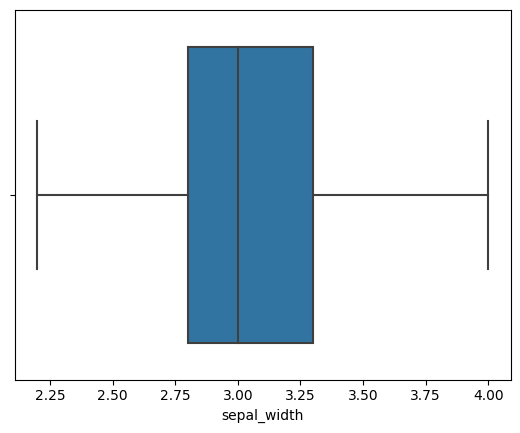

In [ ]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25,
                interpolation = 'midpoint')

Q3 = np.percentile(df['sepal_width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal_width', data=df)


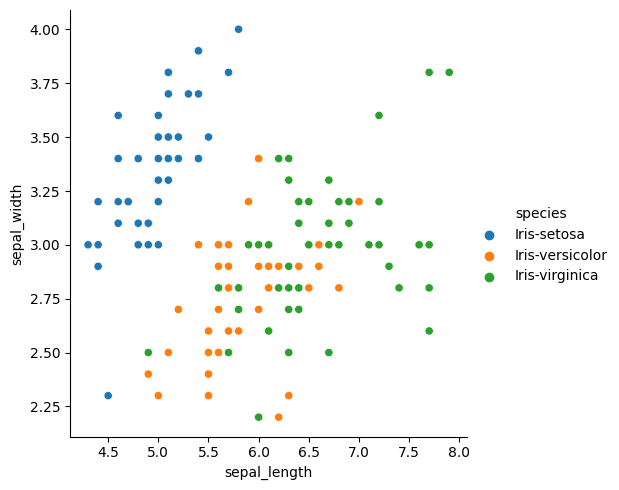

In [ ]:
sns.relplot(x='sepal_length',y='sepal_width',data=df,kind='scatter',hue='species' )

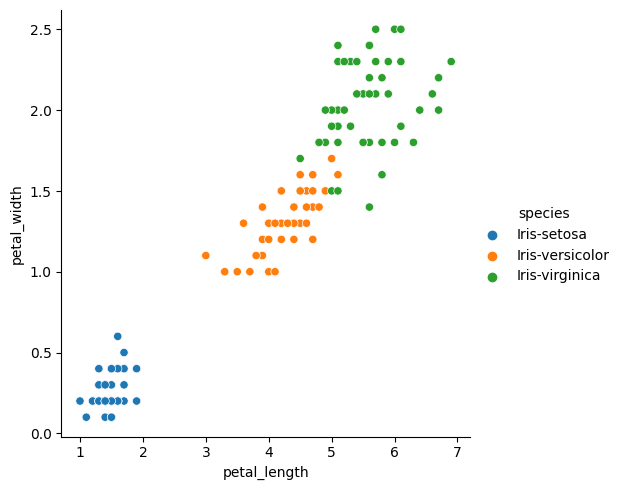

In [ ]:
sns.relplot(x='petal_length',y='petal_width',data=df,kind='scatter',hue='species' )

In [ ]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: >

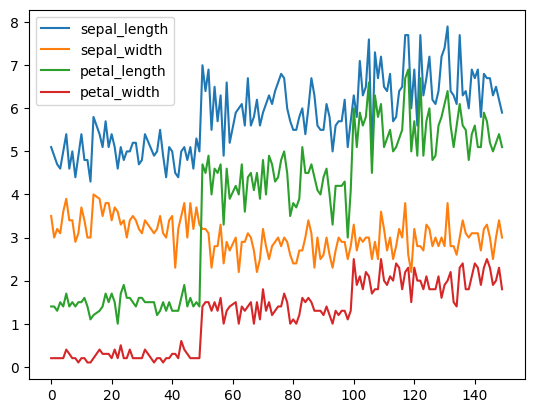

In [ ]:
df.plot()

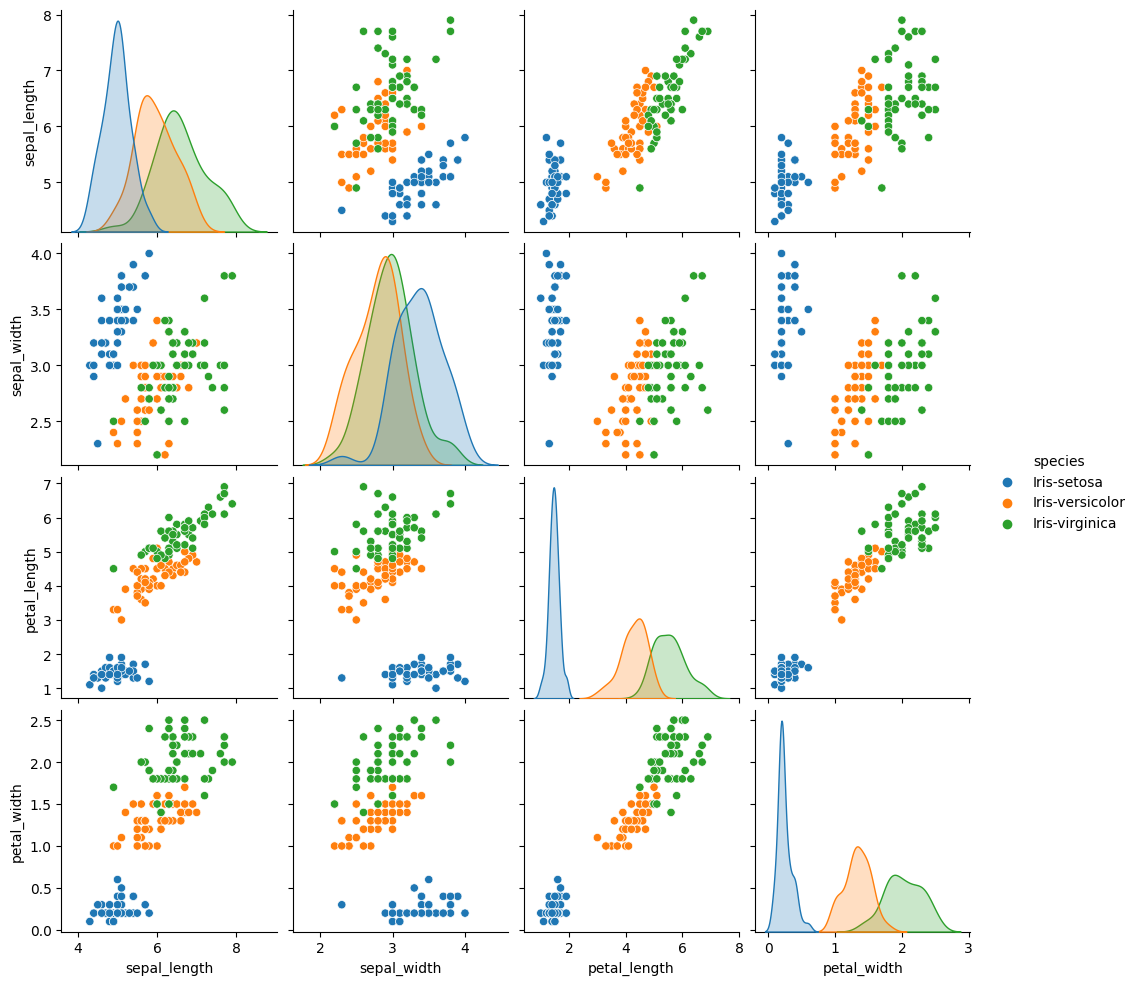

In [ ]:
sns.pairplot(df, hue='species')

<ipython-input-20-154042c8fb64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


<Axes: >

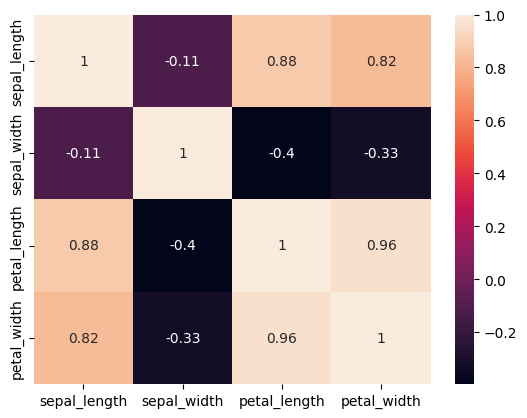

In [ ]:


sns.heatmap(df.corr(method='pearson'),annot=True)


**ENCODING CATEGORICAL VARIABLES**

In [9]:
df['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.head()
#0 = iris-setosa
#1 = iris-versicolor
#2=iris-virginica


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**DATA SPLITTING**

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop(['species'],axis='columns')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
Y=df.species
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [44]:
X = df.drop('species', axis=1)
Y = df['species']



In [45]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [46]:
# Import and create an instance of the SVC model
from sklearn.svm import SVC
svc_model = SVC()

**MODEL TRAINING**

In [47]:
# Train the model on the training data
svc_model.fit(X_train, Y_train)

print("Trained SVC model parameters:")
print("C:", svc_model.C)
print("Kernel:", svc_model.kernel)

Trained SVC model parameters:
C: 1.0
Kernel: rbf


In [48]:
Y_pred=svc_model.predict(X_test)

In [49]:
conf_matrix = confusion_matrix(Y_test, Y_pred)


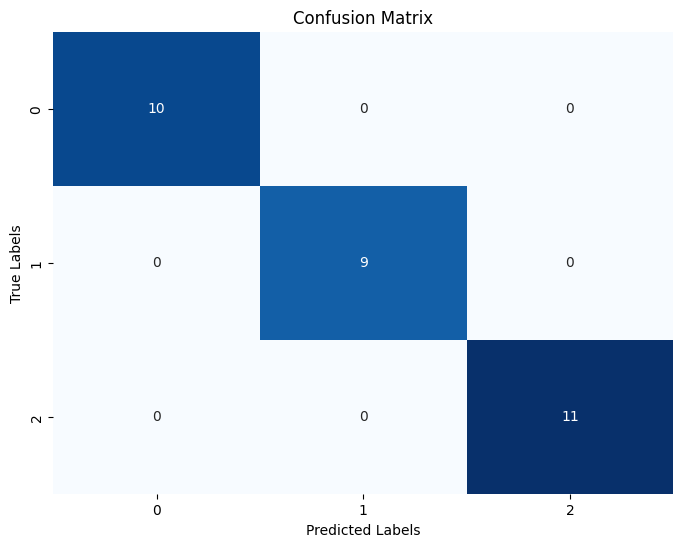

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**MODEL EVALUATION**

In [51]:
# Evaluate the model on the testing data
accuracy = svc_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
